In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('../data/USA/LC/X_train.csv.gz')
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,hardship_flag
0,14400.0,60 months,12.49,323.90,B,7 years,MORTGAGE,40000.0,Not Verified,debt_consolidation,...,16.08,0.0,770.0,0.0,13.0,0.0,7771.0,13.8,30.0,N
1,9600.0,36 months,13.99,328.06,C,6 years,RENT,60000.0,Verified,debt_consolidation,...,16.54,0.0,675.0,1.0,12.0,0.0,10965.0,87.7,31.0,N
2,11500.0,60 months,15.61,277.29,C,10+ years,RENT,34000.0,Source Verified,debt_consolidation,...,17.08,0.0,685.0,0.0,7.0,0.0,9321.0,48.8,8.0,N
3,10000.0,36 months,11.49,329.72,B,10+ years,MORTGAGE,49000.0,Source Verified,credit_card,...,13.92,1.0,680.0,1.0,9.0,0.0,5984.0,48.3,34.0,N
4,3500.0,36 months,19.03,128.35,D,10+ years,MORTGAGE,40000.0,Source Verified,debt_consolidation,...,24.33,0.0,660.0,0.0,7.0,1.0,9254.0,54.1,16.0,N


In [7]:
df['grade'] = df['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

In [8]:
X = df[[x for x in df.columns if x != 'grade']]
y= df.grade

In [9]:
y.value_counts()

2    295641
3    287178
1    177873
4    150137
5     70729
6     24264
7      6958
Name: grade, dtype: int64

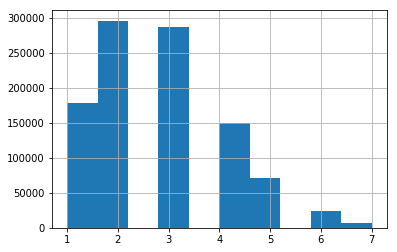

In [11]:
y.hist()

In [12]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'hardship_flag'],
      dtype='object')

In [13]:
grade_vars = ['emp_length', 'home_ownership', 'annual_inc', 
                'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths','open_acc', 
                    'pub_rec', 'revol_bal', 'total_acc']  

grade_vars: variables related to the person not to the characteristics of the loan

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45, shuffle=True)

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from transformers import ColumnSelectTransformer, EncoderTransformer
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


fico_vars = ['emp_length', 'home_ownership', 'annual_inc', 
                'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths','open_acc', 
                    'pub_rec', 'revol_bal', 'total_acc']  

cst = ColumnSelectTransformer(fico_vars)
sce = EncoderTransformer()
sc = MinMaxScaler()
clf = Ridge(alpha=5, max_iter=3000)

pipe_rdg = Pipeline([('colsel', cst), ('sce', sce), ('scaler', sc), ('lasso', clf)])

In [36]:
pipe_rdg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('colsel', ColumnSelectTransformer(col_names=['emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc'])), ('sce', EncoderTransformer()), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('lasso', Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [37]:
y_pred = pipe_rdg.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

1.2006375348419

0.5    : 1.2006510895346694
1      : 1.200639055955152
2      : 1.2006236415175973
3      : 1.200618880301586
4      : 1.20062380324429
5      : 1.2006375348419

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from transformers import ColumnSelectTransformer, EncoderTransformer
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


fico_vars = ['emp_length', 'home_ownership', 'annual_inc', 
                'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths','open_acc', 
                    'pub_rec', 'revol_bal', 'total_acc']  

cst = ColumnSelectTransformer(fico_vars)
sce = EncoderTransformer()
sc = MinMaxScaler()
clf = Ridge(alpha=3, max_iter=3000)

pipe_grade = Pipeline([('colsel', cst), ('sce', sce), ('scaler', sc), ('Ridge', clf)])

In [40]:
pipe_grade.fit(X, y)

Pipeline(memory=None,
     steps=[('colsel', ColumnSelectTransformer(col_names=['emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc'])), ('sce', EncoderTransformer()), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('Ridge', Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [42]:
import joblib
joblib.dump(pipe_grade, '../data/USA/LC/grade_model.pkl')

['../data/USA/LC/grade_model.pkl']

In [43]:
import joblib
#from transformers import ColumnSelectTransformer

pipe_fico = joblib.load('../data/USA/LC/grade_model.pkl')

In [44]:
y_pred = pipe_fico.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

1.2005457654642253